# Problem 1 -- Abalone Data Set

In this problem, we will build models to predict the age of an abalone using the physical features.

## 1. Data loading
The data contains a total of 4177 samples, each with 8 features (7 continuous and 1 categorical) and 1 label. The features include Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, and Shell weight. The label of data is Rings, which can be translated into age by adding 1.5 to its values.

First we load data in using pandas. 

In [20]:
import pandas as pd
dftrain = pd.read_csv(
  'abalone.data',
  names=['sex','length','diameter','height','whole_weight', 'shucked_weight','viscera_weight','shell_weight','rings'])

The input data looks like this.

In [21]:
print(dftrain.head(6))

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  


We manually pick several features and inspect their correlation with the label. It was observed that for many features, distribution of label values tends to expand when feature values gets larger.

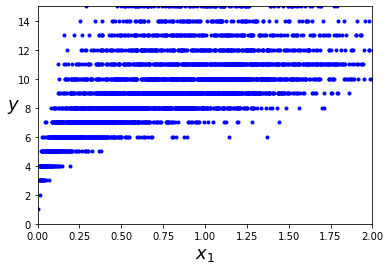

In [22]:
import matplotlib.pyplot as plt

dflabel = dftrain.pop('rings')
plt.plot(dftrain['whole_weight'], dflabel, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 2. Data preprocessing
In this section, a series of data preprocessing are applied before feeding it into the training session.

### 2.1 Encoding
Here we start with encoding categorical values into numeric ones. There are several popular ways to encode categorical values, such as label encoding, one-hot encoding and multi-hot encoding. In this case, we apply label encoding to the categorical features, because one-hot and multi-hot encoding creates additional columns and hence increases the total size of training set.

In [23]:
from sklearn import preprocessing

dftrain['sex'] = preprocessing.LabelEncoder().fit_transform(dftrain['sex'])

### 2.2 Shuffling
We then shuffle the data set and pop out the label. Please be noted that generalization of data is not carried out during data preprocessing, as Sci-kit learn already provides a handy option of doing so at the training session.

In [24]:
from sklearn.utils import shuffle

dftrain = shuffle(dftrain, random_state=8)


The features are now:

In [25]:
print(dftrain.head(5))

      sex  length  diameter  height  whole_weight  shucked_weight  \
2123    0   0.290     0.210   0.075        0.2750          0.1130   
3669    1   0.585     0.460   0.140        0.7635          0.3260   
2218    2   0.495     0.390   0.150        0.8530          0.3285   
2434    1   0.635     0.500   0.180        1.3190          0.5485   
3599    2   0.735     0.555   0.220        2.3330          1.2395   

      viscera_weight  shell_weight  
2123          0.0675        0.0350  
3669          0.1530        0.2650  
2218          0.1890        0.2700  
2434          0.2920        0.4900  
3599          0.3645        0.6195  


And the label:

In [26]:
print(dflabel.head(5))

0    15
1     7
2     9
3    10
4     7
Name: rings, dtype: int64


### 2.3 Data split
Now we split the data into train and test sets. Please be noted that we picked 80% as train set and 20% as the test.

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dftrain, dflabel, test_size=0.2, random_state=42)

## 3. Model Training: a regression problem

### 3.1 Linear regression
We first trained a model using a linear regressor from Sci-kit Learn with all default parameters, as the benchmark. As we've mentioned earlier, training data is normalized during this session ("normalize=True").

In [28]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(normalize=True)
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

The results are:

In [29]:
from sklearn.metrics import mean_squared_error

print('Mean squared error for training: %.4f' % mean_squared_error(linear_reg.predict(x_train), y_train))

Mean squared error for training: 10.2523


The model is then evaluated as follows.

In [30]:
print('Mean squared error for evaluation: %.4f' % mean_squared_error(linear_reg.predict(x_test), y_test))

Mean squared error for evaluation: 10.8472


To avoid overfitting and underfitting, a cross-validation approach is also taken. 

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_reg, dftrain, dflabel, cv=5, scoring='neg_mean_squared_error')

print('Scores for negative mean squared error: ', scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores for negative mean squared error:  [-20.57883148  -6.53420956 -11.92627395  -8.00908461  -7.55502367]
Accuracy: -10.92 (+/- 10.33)


We also try a variety of other linear models using regularization like Lasso, Ridge and Elastic-net to fine-tune the model.

### 3.2 Lasso (L1 reg)

In [32]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(x_train, y_train)

print('Lasso mean squared error for training: %.4f' % mean_squared_error(lasso_reg.predict(x_train), y_train))
print('Lasso mean squared error for evaluation: %.4f' % mean_squared_error(lasso_reg.predict(x_test), y_test))

Lasso mean squared error for training: 10.2809
Lasso mean squared error for evaluation: 10.8328


### 3.3 Ridge (L2 reg)

In [33]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01, solver="cholesky")
ridge_reg.fit(x_train, y_train)

print('Ridge mean squared error for training: %.4f' % mean_squared_error(ridge_reg.predict(x_train), y_train))
print('Ridge mean squared error for evaluation: %.4f' % mean_squared_error(ridge_reg.predict(x_test), y_test))

Ridge mean squared error for training: 10.2523
Ridge mean squared error for evaluation: 10.8470


### 3.4 Elastic net (L1 and L2 reg)

In [34]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)
elastic_net.fit(x_train, y_train)

print('Elastic-net mean squared error for training: %.4f' % mean_squared_error(elastic_net.predict(x_train), y_train))
print('Elastic-net mean squared error for evaluation: %.4f' % mean_squared_error(elastic_net.predict(x_test), y_test))

Elastic-net mean squared error for training: 10.2781
Elastic-net mean squared error for evaluation: 10.8322


## 4. Model training: a classification problem

This problem can also be interpreted as a classification problem, where each age (as 'rings' + 1.5 in the data) represents a class. Hence, we can build a series of classification models to verify the quality of models.

### 4.1 Logistic regression
First we build a logistic regression model.

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=500, penalty='l2', multi_class='multinomial', solver='lbfgs')
logistic_reg.fit(x_train, y_train)

print('Logistic reg mean squared error for training: %.4f' % mean_squared_error(logistic_reg.predict(x_train), y_train))
print('Logistic reg mean squared error for evaluation: %.4f' % mean_squared_error(logistic_reg.predict(x_test), y_test))

score = logistic_reg.score(x_test, y_test)
print('Logistic reg score: %.4f' % score)

Logistic reg mean squared error for training: 10.8710
Logistic reg mean squared error for evaluation: 11.3577
Logistic reg score: 0.1675


Similar as before, we also run a cross-validation against this too. Also noted that due to the nature of multi-class job, we here prefer accuracy over f1_score, as the former is more self-representative when number of class if not intuitively known.

Also, Sci-kit Learn would throw warnings when data set only contains a target/class with only one sample. Because we don't want to alter or drop any sample from data, we will just mute the warnings for now.

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_reg, dftrain, dflabel, cv=5, scoring='accuracy')

print('Scores for accuracy: ', scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores for accuracy:  [0.16352941 0.15576694 0.14885954 0.16646562 0.14927184]
Accuracy: 0.16 (+/- 0.01)


After several times of attempt by tuning the parameters, including l1_reg, l2_reg, number of iterations and multi-class approaches, the score still seemed disappointing. It is possible that age of abalones doesn't have a linear relationship against the input features. Therefore, a non-linear model, like a tree, may be a better solution of this problem.

### 4.2 Gradient boosted tree
Gradient boosting ensembles weak prediction models, typically decision trees, in producing high-quality models.

In [37]:
from sklearn import ensemble

params = {'n_estimators':300, 'max_depth':5, 'learning_rate':0.1, 'loss':'deviance'}
gbtree_classifier = ensemble.GradientBoostingClassifier(**params)
gbtree_classifier.fit(x_train, y_train)
print('Gradient boosted tree mean squared error for training: %.4f'
      % mean_squared_error(gbtree_classifier.predict(x_train), y_train))
print('Gradient boosted tree mean squared error for evaluation: %.4f'
      % mean_squared_error(gbtree_classifier.predict(x_test), y_test))


Gradient boosted tree mean squared error for training: 0.0431
Gradient boosted tree mean squared error for evaluation: 17.8469


Cross-validation is applied to this model too. Please be aware that MSE for training is 0! To reduce overfitting, we will take several actions as mentioned in the last part.

In [38]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbtree_classifier, dftrain, dflabel, cv=5, scoring='accuracy')

print('Scores for accuracy: ', scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores for accuracy:  [0.12588235 0.12366231 0.11284514 0.13510253 0.12621359]
Accuracy: 0.12 (+/- 0.01)


Gradient boosted trees can easily get into overfitting issues. The example above shows one case of overfiting. To reduce overfitting, a number of actions have been taken, which included:

1. Smaller learning rate.
2. Stochastic gradient boosting (with subsample < 1).
3. Minimize tree depth.
4. Use of regularization.

In the end, the optimal parameters were found as follows.

In [39]:
params = {'n_estimators':500, 'subsample':0.5, 'max_depth':2, 'learning_rate':0.01, 'max_features':2, 'loss':'deviance'}
gbtree_classifier = ensemble.GradientBoostingClassifier(**params)
gbtree_classifier.fit(x_train, y_train)

print('Gradient boosted tree mean squared error for training: %.4f'
      % mean_squared_error(gbtree_classifier.predict(x_train), y_train))
print('Gradient boosted tree mean squared error for evaluation: %.4f'
      % mean_squared_error(gbtree_classifier.predict(x_test), y_test))

Gradient boosted tree mean squared error for training: 8.7953
Gradient boosted tree mean squared error for evaluation: 11.7117


In [40]:
scores = cross_val_score(gbtree_classifier, dftrain, dflabel, cv=5, scoring='accuracy')

print('Scores for accuracy: ', scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores for accuracy:  [0.16470588 0.15219976 0.18127251 0.17852835 0.14927184]
Accuracy: 0.17 (+/- 0.03)
